In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
! git clone https://github.com/pierinim/tutorials.git
! ls tutorials/Data/JetDataset

fatal: destination path 'tutorials' already exists and is not an empty directory.
jetImage_7_100p_0_10000.h5	jetImage_7_100p_50000_60000.h5
jetImage_7_100p_10000_20000.h5	jetImage_7_100p_60000_70000.h5
jetImage_7_100p_30000_40000.h5	jetImage_7_100p_70000_80000.h5
jetImage_7_100p_40000_50000.h5	jetImage_7_100p_80000_90000.h5


Declaring the taget and features for the dataset.

In [3]:
target = np.array([])
features = np.array([])
#we will take few files instead of all the data
datafiles = ['tutorials/Data/JetDataset/jetImage_7_100p_30000_40000.h5',
           'tutorials/Data/JetDataset/jetImage_7_100p_60000_70000.h5',
            'tutorials/Data/JetDataset/jetImage_7_100p_50000_60000.h5',
            'tutorials/Data/JetDataset/jetImage_7_100p_10000_20000.h5',
            'tutorials/Data/JetDataset/jetImage_7_100p_0_10000.h5']
for fileIN in datafiles:
  print("Appending %s" %fileIN)
  f= h5py.File(fileIN)
  myFeatures = np.array(f.get('jets')[:, [12, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 52]])
  myTarget = np.array(f.get("jets")[0:,-6:-1])
  features = np.concatenate([features,myFeatures],axis = 0)if features.size else myFeatures
  target = np.concatenate([target,myTarget])if target.size else myTarget
  f.close()
print(target.shape, features.shape)


Appending tutorials/Data/JetDataset/jetImage_7_100p_30000_40000.h5
Appending tutorials/Data/JetDataset/jetImage_7_100p_60000_70000.h5
Appending tutorials/Data/JetDataset/jetImage_7_100p_50000_60000.h5
Appending tutorials/Data/JetDataset/jetImage_7_100p_10000_20000.h5
Appending tutorials/Data/JetDataset/jetImage_7_100p_0_10000.h5
(50000, 5) (50000, 16)


so the dataset consists of 5000 jets each represented by 16 features.

now we will train the dataset for our dense neural network

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.33)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)
del features, target

(33500, 16) (16500, 16) (33500, 5) (16500, 5)


(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

#DENSE NEURAL NETWORK MODEL BUILDING

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN

In [6]:
input_shape = X_train.shape[1]
dropoutRate = 0.25

In [7]:
inputArray = Input(shape=(input_shape,))
#
x = Dense(30, activation='relu')(inputArray)
x = Dropout(dropoutRate)(x)
#
x = Dense(25)(x)
x = Activation('relu')(x)
x = Dropout(dropoutRate)(x)
#
x = Dense(10, activation='relu')(x)
x = Dropout(dropoutRate)(x)
#
x = Dense(5, activation='relu')(x)
#
output = Dense(5, activation='softmax')(x)
####
model = Model(inputs=inputArray, outputs=output)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 30)                510       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                775       
                                                                 
 activation (Activation)     (None, 25)                0         
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                260   

LET's train the model

In [9]:
batch_size = 128
n_epochs = 50
history = model.fit(X_train, Y_train, epochs=n_epochs, batch_size=batch_size, verbose = 2,
                validation_data=(X_val, Y_val),
                callbacks = [
                EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1),
                TerminateOnNaN()])

Epoch 1/50
262/262 - 1s - loss: 2.3668 - val_loss: 1.6125 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 2/50
262/262 - 1s - loss: 1.6278 - val_loss: 1.5203 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 3/50
262/262 - 1s - loss: 1.5448 - val_loss: 1.4759 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 4/50
262/262 - 1s - loss: 1.5036 - val_loss: 1.4502 - lr: 0.0010 - 962ms/epoch - 4ms/step
Epoch 5/50
262/262 - 1s - loss: 1.4780 - val_loss: 1.4343 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 6/50
262/262 - 1s - loss: 1.4608 - val_loss: 1.4227 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 7/50
262/262 - 2s - loss: 1.4472 - val_loss: 1.4161 - lr: 0.0010 - 2s/epoch - 6ms/step
Epoch 8/50
262/262 - 1s - loss: 1.4389 - val_loss: 1.4158 - lr: 0.0010 - 943ms/epoch - 4ms/step
Epoch 9/50
262/262 - 1s - loss: 1.4293 - val_loss: 1.4084 - lr: 0.0010 - 974ms/epoch - 4ms/step
Epoch 10/50
262/262 - 1s - loss: 1.4210 - val_loss: 1.4118 - lr: 0.0010 - 1s/epoch - 5ms/step
Epoch 11/50
262/262 - 1s - loss: 1.4171 - val_loss: 1.4065 -

plotting the training Hoistory

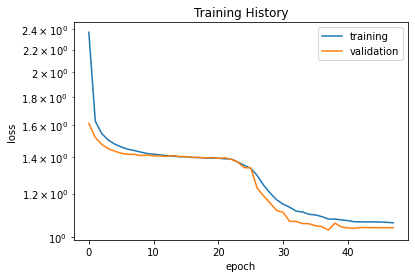

In [10]:
# plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('Training History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

LET's build the ROC curves

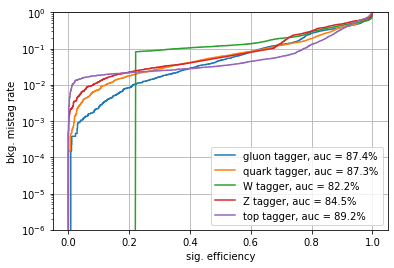

In [11]:
labels = ['gluon', 'quark', 'W', 'Z', 'top']
import pandas as pd
from sklearn.metrics import roc_curve, auc
predict_val = model.predict(X_val)
df = pd.DataFrame()
fpr = {}
tpr = {}
auc1 = {}

plt.figure()
for i, label in enumerate(labels):
        df[label] = Y_val[:,i]
        df[label + '_pred'] = predict_val[:,i]

        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])

        auc1[label] = auc(fpr[label], tpr[label])

        plt.plot(tpr[label],fpr[label],label='%s tagger, auc = %.1f%%'%(label,auc1[label]*100.))
plt.semilogy()
plt.xlabel("sig. efficiency")
plt.ylabel("bkg. mistag rate")
plt.ylim(0.000001,1)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()